In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import os
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train / 255.0
#x_test = x_test/255.0


In [3]:
from tensorflow.keras.models import load_model
model = load_model("mnist_model.h5")




2025-10-18 10:45:35.099932: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-10-18 10:45:35.099968: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-10-18 10:45:35.099974: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1760759135.100009  514764 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1760759135.100045  514764 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:

prediction = model.predict(x_train)
prediction

  29/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step    

2025-10-18 10:45:35.348083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.8763263e-01, 0.0000000e+00],
       [6.4578026e-35, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2599029e-32, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [12]:
from sklearn.decomposition import PCA
def get_pca_data(_pred_result_:np.array):
    pca = PCA(n_components=5)
    features_reduced = pca.fit_transform(_pred_result_)
    return features_reduced

get_pca_data(prediction)

array([[ 6.1258388e-01, -1.3219400e-01, -1.4833838e-02, -3.0666590e-04,
         4.0698349e-03],
       [ 6.2177849e-01, -1.3670169e-01, -1.8776655e-02, -4.1364431e-03,
        -1.5475601e-03],
       [-7.8724188e-01, -2.5746953e-01, -2.7392060e-02, -5.6434125e-03,
        -2.0539165e-03],
       ...,
       [ 6.2177849e-01, -1.3670169e-01, -1.8776655e-02, -4.1364431e-03,
        -1.5475601e-03],
       [-1.8688510e-01,  1.0220202e+00, -7.6333493e-02, -1.4250293e-02,
        -4.8738867e-03],
       [ 6.2177849e-01, -1.3670169e-01, -1.8776655e-02, -4.1364431e-03,
        -1.5475601e-03]], dtype=float32)

9


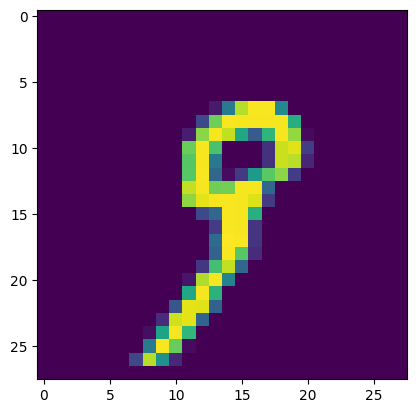

In [5]:
index = 19
import matplotlib.pyplot as plt
image = x_train[index]
label = y_train[index]
print(label)
plt.imshow(image)

In [6]:
import cv2
cv2.imwrite("test_9.jpg",image)

True

In [7]:
def predict_digit(image: np.ndarray):
    image = image.reshape(1, 28, 28)
   
    prediction = model.predict(image)
    print("predicted : ",prediction.argmax())
    return prediction.argmax()


In [8]:
from PIL import Image

image_path = "test_digit_3.png"

image = Image.open(image_path)
img_array = np.array(image)
digit = predict_digit(img_array)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
predicted :  1
1


### Image data analysis

In [9]:
import numpy as np

def extract_image_stats(images):
    stats = {
        "mean_pixel": np.mean(images),
        "std_pixel": np.std(images),
        "min_pixel": np.min(images),
        "max_pixel": np.max(images),
    }
    return stats


In [10]:
extract_image_stats(x_test)

{'mean_pixel': 33.791224489795916,
 'std_pixel': 79.17246322228644,
 'min_pixel': 0,
 'max_pixel': 255}

In [11]:
extract_image_stats(x_train)

{'mean_pixel': 33.318421449829934,
 'std_pixel': 78.56748998339798,
 'min_pixel': 0,
 'max_pixel': 255}